In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize 
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from textblob import TextBlob
from spellchecker import SpellChecker
import emoji
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.chunk import ne_chunk
import datetime

In [2]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mishkaasli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('Desktop/Bitcoin_tweets_updated.csv')

In [6]:
df

,,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,Unnamed: 8,date,text,hashtags,source,is_retweet
0,Bitcoin is Saving,NaN,NaN,42749.53627,159956,6975,159298,False,NaN,5/29/21,“Corporate reserves are not for investing in s...,"['Bitcoin', 'BTC', 'BTC']",Twitter for iPhone,False
1,Altcoin Daily,"Los Angeles, CA",🎥 Follow our YouTube channel for DAILY news & ...,43129.97579,310145,358,20408,False,NaN,5/29/21,#Bitcoin added to another public company's tre...,"['Bitcoin', 'BTC']",Twitter Web App,False
2,Travladd Crypto,"Manchester, England","Partnered @Twitch | Crypto Enthusiast, Investo...",43530.37473,128803,272,30581,False,NaN,5/29/21,Just a reminder #Bitcoin #btc https://t.co/uVI...,"['Bitcoin', 'btc']",Twitter for iPhone,False
3,Altcoin Daily,"Los Angeles, CA",🎥 Follow our YouTube channel for DAILY news & ...,43129.97579,310145,358,20408,False,NaN,5/29/21,Confirmed: #Bitcoin just taking a pit stop and...,"['Bitcoin', 'BTC', 'Indy500']",Twitter Web App,False
4,Investing.com,Global,"📈Real-time global financial market data, news,...",41247.63123,496248,395,5884,True,NaN,5/29/21,*Bitcoin Volume Surges Over $300 Million in Pa...,"['BTC', 'Bitcoin']",Twitter Media Studio,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,Gate.io Exchange,NaN,https://t.co/l3EgEt4lSx was created to enable ...,43004.20138,286799,2108,8489,False,NaN,8/18/21,✨https://t.co/8kWqgEeplL Now Offers Crypto Loa...,"['BTC', 'ETH', 'USDT']",Buffer,False
6951,FABRI CRYPTO,NaN,Crypto Investor💎 NFA. #BTC #BNB #ETH ❤️ I love...,42383.53295,487561,39522,36991,True,NaN,8/18/21,🥇First time in the history of BSC we are prese...,"['BSCGem', 'Cake', 'BTC', 'Ethereum']",Twitter for iPhone,False
6952,LadyCryptoGem 💎,Shilling/Promotion,Crypto Influencer | Grow your Crypto Projects ...,43702.67627,329030,33117,22,False,NaN,8/18/21,I'll hold #BTC #ETH #BNB #TRX and next bags #X...,"['BTC', 'ETH', 'BNB', 'TRX', 'XRP']",Twitter for Android,False
6953,Elja𝕭oom💥,World of Elja & #BoomBag,Founder and CEO of https://t.co/LLSurM7IBO | @...,42212.18962,317362,871,214303,False,NaN,8/18/21,U.S. Halted Dollar Shipments to Afghanistan to...,['BTC'],Twitter for iPhone,False


In [7]:
filter = df['date'] > '6/1/21'
df = df[filter]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6870 entries, 85 to 6954
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0                     6870 non-null   object 
 1   user_location     5178 non-null   object 
 2   user_description  6729 non-null   object 
 3   user_created      6870 non-null   float64
 4   user_followers    6870 non-null   int64  
 5   user_friends      6870 non-null   int64  
 6   user_favourites   6870 non-null   int64  
 7   user_verified     6870 non-null   bool   
 8   Unnamed: 8        0 non-null      float64
 9   date              6870 non-null   object 
 10  text              6870 non-null   object 
 11  hashtags          6870 non-null   object 
 12  source            6870 non-null   object 
 13  is_retweet        6870 non-null   bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 711.2+ KB


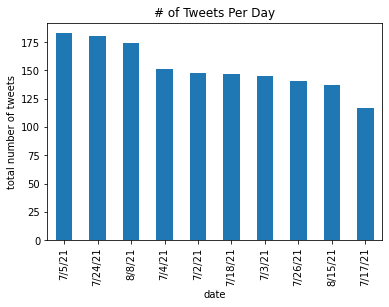

7/21/21    477
6/22/21    419
7/20/21    377
7/23/21    371
8/9/21     352
7/30/21    349
6/21/21    332
7/22/21    320
6/23/21    285
8/20/21    267
8/19/21    264
7/19/21    244
8/16/21    235
8/18/21    226
8/17/21    217
7/5/21     183
7/24/21    180
8/8/21     174
7/4/21     151
7/2/21     148
7/18/21    147
7/3/21     145
7/26/21    141
8/15/21    137
7/17/21    117
8/14/21     88
7/28/21     80
7/27/21     73
8/6/21      64
8/5/21      58
6/20/21     50
7/29/21     45
8/21/21     39
7/25/21     39
8/7/21      38
7/16/21     33
8/4/21       5
Name: date, dtype: int64

In [9]:
sorted_list = (df.date.value_counts())
import matplotlib.pyplot as plt
sorted_list.iloc[15:25].plot(y='value',kind='bar')
plt.ylabel('total number of tweets')
plt.xlabel('date')
plt.title('# of Tweets Per Day')
plt.show()
sorted_list

In [10]:
df = df.drop(['user_location', 'Unnamed: 8',"user_description","user_created", "user_favourites","user_friends","user_verified", "source"], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6870 entries, 85 to 6954
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0                   6870 non-null   object
 1   user_followers  6870 non-null   int64 
 2   date            6870 non-null   object
 3   text            6870 non-null   object
 4   hashtags        6870 non-null   object
 5   is_retweet      6870 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 328.7+ KB


In [12]:
df

,,user_followers,date,text,hashtags,is_retweet
85,Bitcoin Archive 🗄🚀🌔,347102,6/23/21,#Bitcoin and crypto exchange FTX is now a spon...,['Bitcoin'],False
86,Thread Reader App,477881,6/23/21,"@TheRealVSky Guten Tag, you can read it here: ...",['Bitcoin'],False
87,CryptoCurrency News,315910,6/23/21,#Bitcoin is beneficial to everybody but most o...,['Bitcoin'],False
88,TheStreet,786675,6/23/21,Stock Market Today: @jimcramer has a bit of im...,"['Ethereum', 'Bitcoin']",False
89,The Wolf Of All Streets,486343,6/23/21,The reaction when #Bitcoin finally breaks belo...,['Bitcoin'],False
...,...,...,...,...,...,...
6950,Gate.io Exchange,286799,8/18/21,✨https://t.co/8kWqgEeplL Now Offers Crypto Loa...,"['BTC', 'ETH', 'USDT']",False
6951,FABRI CRYPTO,487561,8/18/21,🥇First time in the history of BSC we are prese...,"['BSCGem', 'Cake', 'BTC', 'Ethereum']",False
6952,LadyCryptoGem 💎,329030,8/18/21,I'll hold #BTC #ETH #BNB #TRX and next bags #X...,"['BTC', 'ETH', 'BNB', 'TRX', 'XRP']",False
6953,Elja𝕭oom💥,317362,8/18/21,U.S. Halted Dollar Shipments to Afghanistan to...,['BTC'],False


In [13]:
df = df.dropna()

In [14]:
df['index'] = df.index
df['text'] = df['text'].astype(str)
df['text'] = df['text'].replace('\n',' ', regex=True)

In [15]:
df['new_text1'] = [re.sub(r'(\s)#\w+', r'', x) for x in df['text']]
df['new_text2'] = [re.sub(r'(\s)@\w+', '', x) for x in df['new_text1']]
df.head(320)

,,user_followers,date,text,hashtags,is_retweet,index,new_text1,new_text2
85,Bitcoin Archive 🗄🚀🌔,347102,6/23/21,#Bitcoin and crypto exchange FTX is now a spon...,['Bitcoin'],False,85,#Bitcoin and crypto exchange FTX is now a spon...,#Bitcoin and crypto exchange FTX is now a spon...
86,Thread Reader App,477881,6/23/21,"@TheRealVSky Guten Tag, you can read it here: ...",['Bitcoin'],False,86,"@TheRealVSky Guten Tag, you can read it here: ...","@TheRealVSky Guten Tag, you can read it here: ..."
87,CryptoCurrency News,315910,6/23/21,#Bitcoin is beneficial to everybody but most o...,['Bitcoin'],False,87,#Bitcoin is beneficial to everybody but most o...,#Bitcoin is beneficial to everybody but most o...
88,TheStreet,786675,6/23/21,Stock Market Today: @jimcramer has a bit of im...,"['Ethereum', 'Bitcoin']",False,88,Stock Market Today: @jimcramer has a bit of im...,Stock Market Today: has a bit of important adv...
89,The Wolf Of All Streets,486343,6/23/21,The reaction when #Bitcoin finally breaks belo...,['Bitcoin'],False,89,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...
...,...,...,...,...,...,...,...,...,...
400,David Gokhshtein,398592,6/22/21,#Bitcoin look strong right now. Keep pushing...,['Bitcoin'],False,400,#Bitcoin look strong right now. Keep pushing...,#Bitcoin look strong right now. Keep pushing...
401,Okcoin,129053,6/22/21,Ready to get into the next @Stacks cycle and e...,['Bitcoin'],False,401,Ready to get into the next @Stacks cycle and e...,Ready to get into the next cycle and earn rewa...
402,‏محمد العرب...Mohammed Al arab,690095,6/22/21,Stupidity made in China!! #Bitcoin mining is a...,"['Bitcoin', 'America', 'Texas', 'Crypto']",False,402,Stupidity made in China!! mining is a good exa...,Stupidity made in China!! mining is a good exa...
403,Bitcoin News,1444205,6/22/21,"Jaime Guevara, a Salvadoran representative, ha...",['Bitcoin'],False,403,"Jaime Guevara, a Salvadoran representative, ha...","Jaime Guevara, a Salvadoran representative, ha..."


In [16]:
df['new_text3'] = [re.sub(r'^#\w+', '', x) for x in df['new_text2']]
df['new_text4'] = [re.sub(r'^@\w+', '', x) for x in df['new_text3']]
df['new_text5'] = [re.sub(r'http\S+', '', x) for x in df['new_text4']]
df['new_text6'] = [re.sub(r'(\s)[$]\S+', '', x) for x in df['new_text5']]
df['new_text7'] = [re.sub(r'^[$]\S+', '', x) for x in df['new_text6']]

In [17]:
df['new_text8'] = [re.sub(r'\w*\d\w*', '', x) for x in df['new_text7']]
df['new_text9'] = [re.sub('[%s]' % re.escape(string.punctuation), '',x) for x in df['new_text8']]
df['new_text95'] = [re.sub(r'[^\w\s]', '', x) for x in df['new_text9']]
df['new_text10'] = [x.lower() for x in df['new_text95']]
df['new_text11'] = [emoji.get_emoji_regexp().sub('', x) for x in df['new_text10']]
df['new_text12'] = [re.sub(r'(\s).*?project\S+', '', x) for x in df['new_text11']]
df['new_text125'] = [x.strip() for x in df['new_text12']]
df['new_text1258'] = [x.lstrip(' ') for x in df['new_text125']]
df['new_text1259'] = [x.rstrip('…') for x in df['new_text1258']]
df['new_text13'] = [re.sub(r'[...]$', '', x) for x in df['new_text1259']]
df.new_text13.drop_duplicates()
df.head(50)

,,user_followers,date,text,hashtags,is_retweet,index,new_text1,new_text2,new_text3,...,new_text8,new_text9,new_text95,new_text10,new_text11,new_text12,new_text125,new_text1258,new_text1259,new_text13
85,Bitcoin Archive 🗄🚀🌔,347102,6/23/21,#Bitcoin and crypto exchange FTX is now a spon...,['Bitcoin'],False,85,#Bitcoin and crypto exchange FTX is now a spon...,#Bitcoin and crypto exchange FTX is now a spon...,and crypto exchange FTX is now a sponsor of M...,...,and crypto exchange FTX is now a sponsor of M...,and crypto exchange FTX is now a sponsor of M...,and crypto exchange FTX is now a sponsor of M...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...
86,Thread Reader App,477881,6/23/21,"@TheRealVSky Guten Tag, you can read it here: ...",['Bitcoin'],False,86,"@TheRealVSky Guten Tag, you can read it here: ...","@TheRealVSky Guten Tag, you can read it here: ...","@TheRealVSky Guten Tag, you can read it here: ...",...,"Guten Tag, you can read it here: / In today’s...",Guten Tag you can read it here In today’s De...,Guten Tag you can read it here In todays Del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...
87,CryptoCurrency News,315910,6/23/21,#Bitcoin is beneficial to everybody but most o...,['Bitcoin'],False,87,#Bitcoin is beneficial to everybody but most o...,#Bitcoin is beneficial to everybody but most o...,is beneficial to everybody but most of all to...,...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...
88,TheStreet,786675,6/23/21,Stock Market Today: @jimcramer has a bit of im...,"['Ethereum', 'Bitcoin']",False,88,Stock Market Today: @jimcramer has a bit of im...,Stock Market Today: has a bit of important adv...,Stock Market Today: has a bit of important adv...,...,Stock Market Today: has a bit of important adv...,Stock Market Today has a bit of important advi...,Stock Market Today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...
89,The Wolf Of All Streets,486343,6/23/21,The reaction when #Bitcoin finally breaks belo...,['Bitcoin'],False,89,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,...,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran..

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6870 entries, 85 to 6954
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0                   6870 non-null   object
 1   user_followers  6870 non-null   int64 
 2   date            6870 non-null   object
 3   text            6870 non-null   object
 4   hashtags        6870 non-null   object
 5   is_retweet      6870 non-null   bool  
 6   index           6870 non-null   int64 
 7   new_text1       6870 non-null   object
 8   new_text2       6870 non-null   object
 9   new_text3       6870 non-null   object
 10  new_text4       6870 non-null   object
 11  new_text5       6870 non-null   object
 12  new_text6       6870 non-null   object
 13  new_text7       6870 non-null   object
 14  new_text8       6870 non-null   object
 15  new_text9       6870 non-null   object
 16  new_text95      6870 non-null   object
 17  new_text10      6870 non-null   object
 18  new_tex

In [19]:
string_1 = (df.new_text13[479])
string_1.rstrip('…')
df['date']

85      6/23/21
86      6/23/21
87      6/23/21
88      6/23/21
89      6/23/21
         ...   
6950    8/18/21
6951    8/18/21
6952    8/18/21
6953    8/18/21
6954    8/18/21
Name: date, Length: 6870, dtype: object

In [20]:
df.new_text13

85      and crypto exchange ftx is now a sponsor of ma...
86      guten tag you can read it here  in todays delp...
87      is beneficial to everybody but most of all to ...
88      stock market today has a bit of important advi...
89      the reaction when finally breaks below the ran...
                              ...                        
6950    now offers crypto loans   borrow usdt at  dail...
6951    first time in the history of bsc we are presen...
6952                               ill hold and next bags
6953    us halted dollar shipments to afghanistan to k...
6954    solana has rallied to new all time highs yet a...
Name: new_text13, Length: 6870, dtype: object

In [21]:
df['tokenized_text'] = df['new_text13'].apply(word_tokenize) 
df.head(50)

,,user_followers,date,text,hashtags,is_retweet,index,new_text1,new_text2,new_text3,...,new_text9,new_text95,new_text10,new_text11,new_text12,new_text125,new_text1258,new_text1259,new_text13,tokenized_text
85,Bitcoin Archive 🗄🚀🌔,347102,6/23/21,#Bitcoin and crypto exchange FTX is now a spon...,['Bitcoin'],False,85,#Bitcoin and crypto exchange FTX is now a spon...,#Bitcoin and crypto exchange FTX is now a spon...,and crypto exchange FTX is now a sponsor of M...,...,and crypto exchange FTX is now a sponsor of M...,and crypto exchange FTX is now a sponsor of M...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of m...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...,and crypto exchange ftx is now a sponsor of ma...,"[and, crypto, exchange, ftx, is, now, a, spons..."
86,Thread Reader App,477881,6/23/21,"@TheRealVSky Guten Tag, you can read it here: ...",['Bitcoin'],False,86,"@TheRealVSky Guten Tag, you can read it here: ...","@TheRealVSky Guten Tag, you can read it here: ...","@TheRealVSky Guten Tag, you can read it here: ...",...,Guten Tag you can read it here In today’s De...,Guten Tag you can read it here In todays Del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays del...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...,guten tag you can read it here in todays delp...,"[guten, tag, you, can, read, it, here, in, tod..."
87,CryptoCurrency News,315910,6/23/21,#Bitcoin is beneficial to everybody but most o...,['Bitcoin'],False,87,#Bitcoin is beneficial to everybody but most o...,#Bitcoin is beneficial to everybody but most o...,is beneficial to everybody but most of all to...,...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...,is beneficial to everybody but most of all to ...,"[is, beneficial, to, everybody, but, most, of,..."
88,TheStreet,786675,6/23/21,Stock Market Today: @jimcramer has a bit of im...,"['Ethereum', 'Bitcoin']",False,88,Stock Market Today: @jimcramer has a bit of im...,Stock Market Today: has a bit of important adv...,Stock Market Today: has a bit of important adv...,...,Stock Market Today has a bit of important advi...,Stock Market Today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,stock market today has a bit of important advi...,"[stock, market, today, has, a, bit, of, import..."
89,The Wolf Of All Streets,486343,6/23/21,The reaction when #Bitcoin finally breaks belo...,['Bitcoin'],False,89,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,...,The reaction when finally breaks below the ran...,The reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,the reaction when finally breaks below the ran...,"[the, reaction, when, finally, br

In [22]:
filter_1 = (df['date'] == '8/8/21')
df_1 = df[filter_1]
df_1.head(50)

,,user_followers,date,text,hashtags,is_retweet,index,new_text1,new_text2,new_text3,...,new_text9,new_text95,new_text10,new_text11,new_text12,new_text125,new_text1258,new_text1259,new_text13,tokenized_text
5108,Benjamin Cowen,224031,8/8/21,"As we come into the weekly close, #Bitcoin is ...",['Bitcoin'],False,5108,"As we come into the weekly close, is literally...","As we come into the weekly close, is literally...","As we come into the weekly close, is literally...",...,As we come into the weekly close is literally ...,As we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,as we come into the weekly close is literally ...,"[as, we, come, into, the, weekly, close, is, l..."
5109,Wealth Theory ™,198973,8/8/21,I’m not sure that people have grasped the fina...,['Bitcoin'],False,5109,I’m not sure that people have grasped the fina...,I’m not sure that people have grasped the fina...,I’m not sure that people have grasped the fina...,...,I’m not sure that people have grasped the fina...,Im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,im not sure that people have grasped the finan...,"[im, not, sure, that, people, have, grasped, t..."
5110,Benjamin Cowen,224031,8/8/21,15 minutes to go... Will #Bitcoin close above...,['Bitcoin'],False,5110,15 minutes to go... Will close above the 20W ...,15 minutes to go... Will close above the 20W ...,15 minutes to go... Will close above the 20W ...,...,minutes to go Will close above the SMA,minutes to go Will close above the SMA,minutes to go will close above the sma,minutes to go will close above the sma,minutes to go will close above the sma,minutes to go will close above the sma,minutes to go will close above the sma,minutes to go will close above the sma,minutes to go will close above the sma,"[minutes, to, go, will, close, above, the, sma]"
5111,Benjamin Cowen,224031,8/8/21,"All the ""market cycles"" of insane price apprec...","['Bitcoin', 'Bitcoin']",False,5111,"All the ""market cycles"" of insane price apprec...","All the ""market cycles"" of insane price apprec...","All the ""market cycles"" of insane price apprec...",...,All the market cycles of insane price apprecia...,All the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,all the market cycles of insane price apprecia...,"[all, the, market, cycles, of, insane, price, ..."
5112,Preston Pysh,248328,8/8/21,@JStein_WaPo Jeff here’s the story: the #Bitco...,['Bitcoin'],False,5112,@JStein_WaPo Jeff here’s the story: the incent...,@JStein_WaPo Jeff here’s the story: the incent...,@JStein_WaPo Jeff here’s the story: the incent...,...,Jeff here’s the story the incentive structure...,Jeff heres the story the incentive structure ...,jeff heres the story the incentive structure ...,jeff heres the story the incentive structure ...,jeff heres the story the incentive structure ...,jeff heres the story the incentive structure t...,jeff heres the story the incentive structure t...,jeff heres the story the incentive structure t...,jeff heres the story the incentive structure t...,"[jeff, heres, the, story, the, incentive, stru..."
5113,Wealth Theory ™,198973,8/8/21,Gold breaks under $

In [23]:
df.to_csv('preprocessing_df.csv')